In [1]:
#Logistic Regression - Titanic Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Exploratory data analysis

In [5]:
#Seeing for missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#Plotting it using heatmap

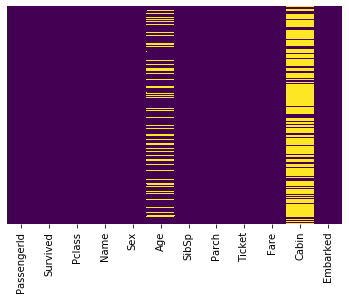

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

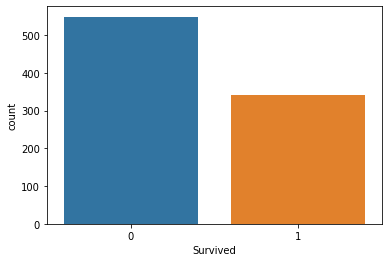

In [8]:
#Survived data visualizatn using countplot
sns.countplot(x = 'Survived',data=train)

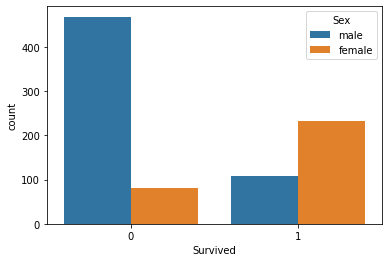

In [9]:
#Countplot of Survived using hue='Sex'
sns.countplot(x = 'Survived',hue = 'Sex',data = train)

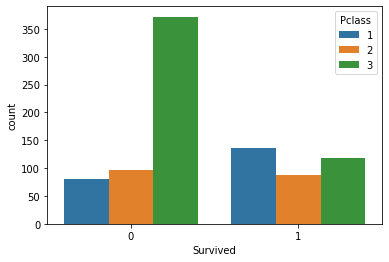

In [10]:
#Countplot of Survived using hue='Pclass'
sns.countplot(x = 'Survived',hue = 'Pclass',data = train)

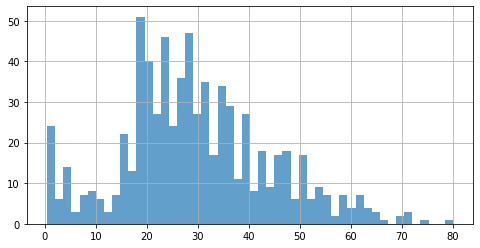

In [11]:
#Histogram for Age
fig = plt.figure(figsize=(8,4))
train['Age'].hist(bins = 50,alpha = 0.7)
#Similarly we can do it for Fare and other features as well

In [12]:
#DATA CLEANING

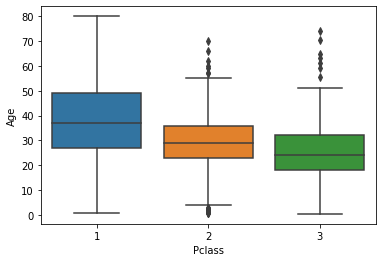

In [13]:
#Filling the missing values of age using boxplot
#Boxplot will help in knowing the avg age with the help of Pclass
sns.boxplot(x = 'Pclass', y='Age',data=train)

In [14]:
#Creating fxn to fill out missing age values

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 36
        
        elif Pclass == 2:
            return 28
        
        else:
            return 23
        
    else:
        return Age
        
        
            
    
    
    
    

In [15]:
#Applying the fxn
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

In [16]:
#Checking the null values
train.isnull().sum() #Age has no NaN values now

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#Cabin is of not much use,will drop it
train.drop('Cabin',inplace = True,axis = 1)

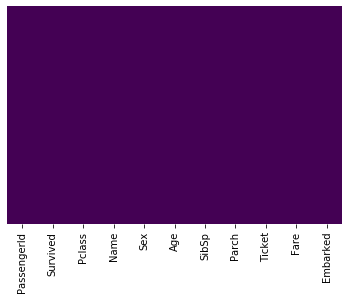

In [18]:
#Heatmap 
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') 

In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
#Dropping the Nan values
train.dropna(inplace = True)

In [21]:
#Converting categorical features to dummy variables

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)


In [23]:
#We will now drop the actual Sex and Embarked columns
#We will also drop Name and Ticket columns as they are of no use
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [24]:
train = pd.concat([train,sex,embark],axis=1)

In [25]:
train.head() #SibSp is Sibling/Spouse  and Parch is Parent/Child

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
#Building Logistic Regression model 


In [27]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.64      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

[[148  15]
 [ 37  67]]


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(y_test,y_pred))

0.8052434456928839
